In [70]:
import scipy.io.wavfile as wav
import scipy.signal
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [48]:
fs, x1 = wav.read('samples/recording1.wav')
x1 = x1 / np.max(abs(x1))

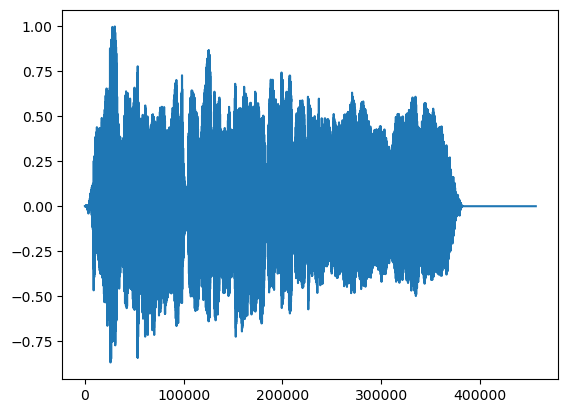

In [49]:
plt.plot(x1)

In [50]:
f01, voiced_flag, voiced_probs = librosa.pyin(x1, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
f01 = f01[~np.isnan(f01)]

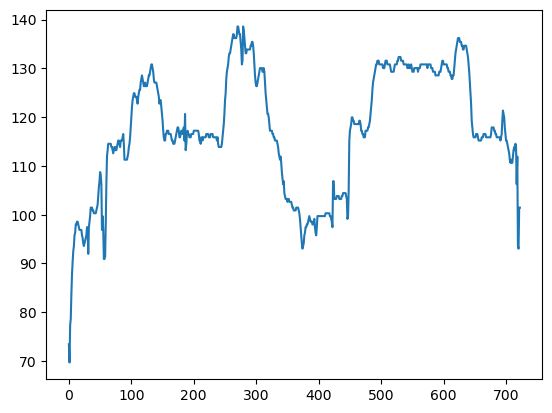

In [51]:
plt.plot(f01)

In [52]:
fs, x2 = wav.read('samples/synth.wav')
x2 = x2 / np.max(abs(x2))

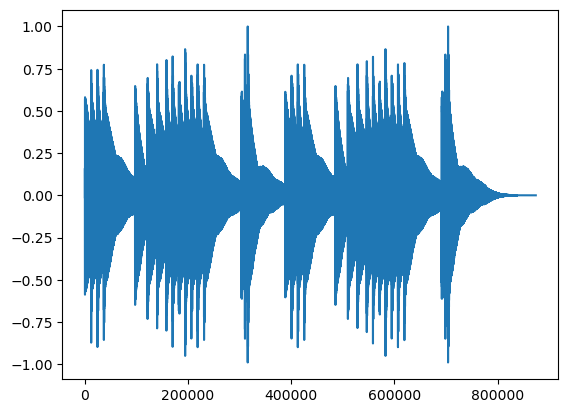

In [53]:
plt.plot(x2)

In [54]:
f02, voiced_flag, voiced_probs = librosa.pyin(x2, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
f02 = f02[~np.isnan(f02)]

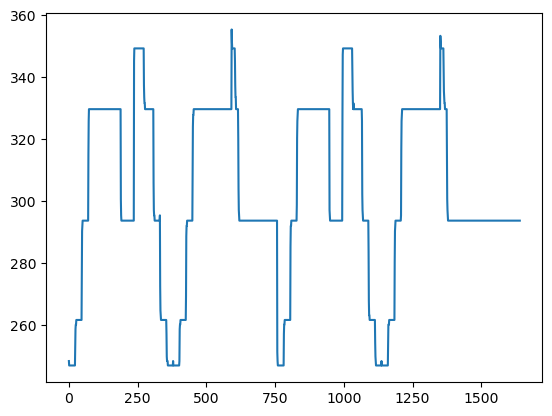

In [55]:
plt.plot(f02)

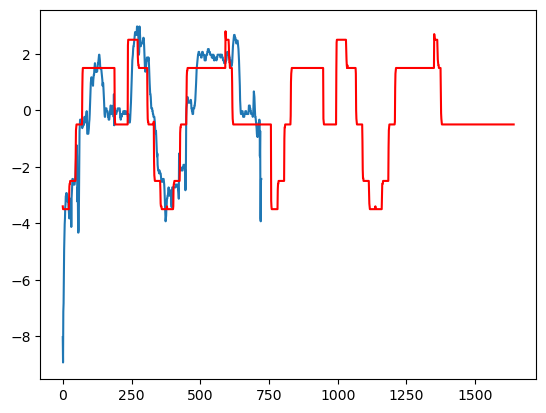

In [95]:
note_nums1 = librosa.hz_to_midi(f01)
note_nums2 = librosa.hz_to_midi(f02)

note_nums1 = note_nums1 - np.mean(note_nums1)
note_nums2 = note_nums2 - np.mean(note_nums2)
plt.plot(note_nums1)
plt.plot(note_nums2, c='r')

In [96]:
D, wp = librosa.sequence.dtw(note_nums1, note_nums2, subseq=True, global_constraints=True, band_rad=0.001)

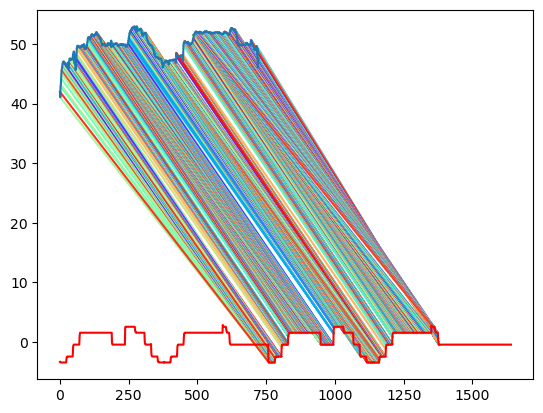

In [97]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(wp)))

for i, (idx1, idx2) in enumerate(wp):
    color = np.random.randint(len(colors))
    plt.plot([wp[i][0], wp[i][1]], [note_nums1[wp[i][0]] + 50, note_nums2[wp[i][1]]], color=colors[color])
    
plt.plot(note_nums1 + 50)
plt.plot(note_nums2, c='r')

In [126]:
print(D[-1, -1])

229.52664653927414


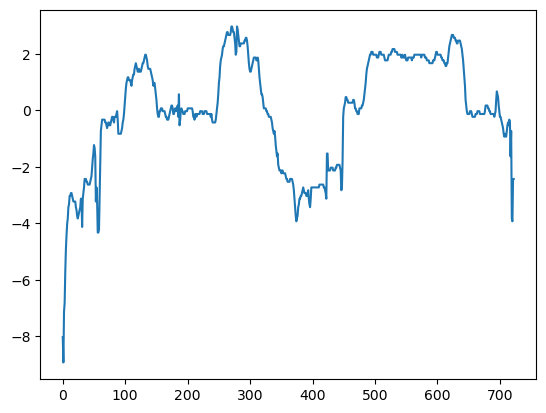

In [127]:
#note_nums1 = np.round(note_nums1)
plt.plot(note_nums1)

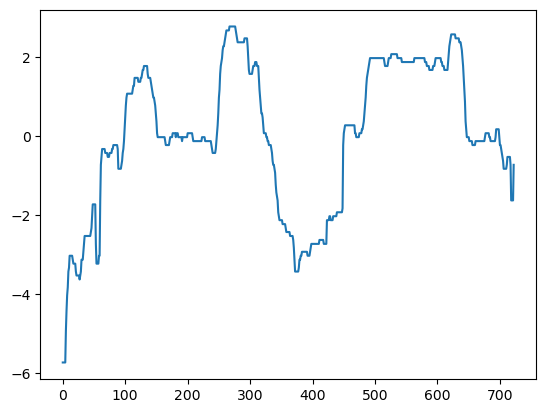

In [129]:
note_nums1_medfilt = scipy.signal.medfilt(note_nums1, kernel_size=9)
plt.plot(note_nums1_medfilt)

In [130]:
D2, wp2 = librosa.sequence.dtw(note_nums1_medfilt, note_nums2, subseq=True, global_constraints=True, band_rad=0.001)

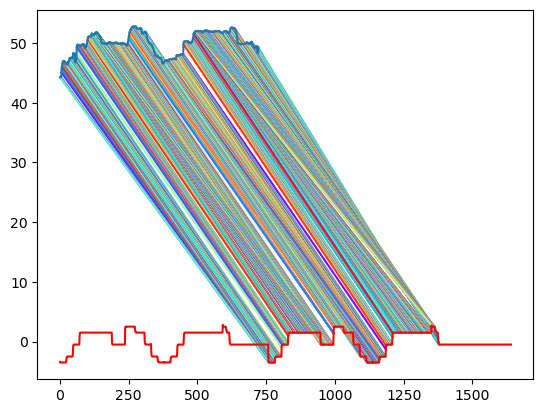

In [131]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(wp)))

for i, (idx1, idx2) in enumerate(wp2):
    color = np.random.randint(len(colors))
    plt.plot([wp2[i][0], wp2[i][1]], [note_nums1_medfilt[wp2[i][0]] + 50, note_nums2[wp2[i][1]]], color=colors[color])
    
plt.plot(note_nums1_medfilt + 50)
plt.plot(note_nums2, c='r')

In [132]:
print(D[-1, -1])

229.52664653927414
